<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>

Родион, доброго дня! рад приветствовать тебя вновь<br />
(а дальше шаболонная обязательная часть, как ты заметил по другим спринтам)

<br />
Меня зовут Николай Шавлюго. <br />И на этом этапе твоего движения к новой профессии от меня будут комментарии по написанному коду. <br />Чтобы меньше "мусорить эфир" и чтобы максимально наглядно отделяться от основного кода, есть предложение условиться в некоторых обозначениях:<br /> <br />
<u><b>ТАКОЙ ШРИФТ</b></u> - всегда начало комментария <br />
<font color='green'>такой шрифт</font> - комментарии о том, что всё ОК <br/>
<font color='orange'>такой шрифт</font> - комментарии о том, что всё ОК по результату,<br> однако есть на что обратить внимание в плане применения техник, или есть способы сделать более короткий или быстрый код <br/>
<font color='red'>такой шрифт</font> - комментарии о том, что есть критичный момент, влияющий на бизнес-результат проекта.<br/>
</font><br /><br />
<font color='green'>Моей целью является не "уличить" в не знании, а просто высказать сверху твоих знаний - свой опыт, что бы ты мог использовать его для своего дальнейшего успеха) И очень здорово будет, если тебе удастся задавать вопросы, да и вообще - всячески доставать меня, если я по каким-то причинам не приму проект:) При этом, из своего опыта скажу, хорошо и важно, когда переписка ревьюера и студента - сохраняется на следующие проекты и даже на будущую практическую деятельность.<br>
<BR> В ПУТЬ!<br>

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод:</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

# Описание данных

Набор данных находится в файле /datasets/insurance.csv.   
**Признаки**: пол, возраст и зарплата застрахованного, количество членов его семьи.   
**Целевой признак**: количество страховых выплат клиенту за последние 5 лет.   

## Загрузка данных

In [1]:
#загрузка библиотек
import pandas as pd
#установим точность float 2 знака
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option("precision", 3)
#графика
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
#
import numpy as np
from scipy import stats as st
#
#машинное обучение
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
pd.options.mode.chained_assignment = None
#модели
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression 
from sklearn.dummy import DummyClassifier
#метрики
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import mean_squared_error 
#работа с дисбалансом
from sklearn.utils import shuffle
#
from IPython.display import display, HTML, display_html
# importing "copy" for copy operations 
import copy

Таблица data0


,пол,возраст,зарплата,члены семьи,страховые выплаты
0,1,41.000,49600.000,1,0
1,0,46.000,38000.000,1,1
2,0,29.000,21000.000,0,0
3,0,21.000,41700.000,2,0
4,1,28.000,26100.000,0,0
5,1,43.000,41000.000,2,1
6,1,39.000,39700.000,2,0
7,1,25.000,38600.000,4,0
8,1,36.000,49700.000,1,0
9,1,32.000,51700.000,1,0


(5000, 5)

пол                    int64
возраст              float64
зарплата             float64
члены семьи            int64
страховые выплаты      int64
dtype: object

,percent_of_nulls
пол,0.00%
возраст,0.00%
зарплата,0.00%
члены семьи,0.00%
страховые выплаты,0.00%


,пол,возраст,зарплата,члены семьи,страховые выплаты
count,5000.000,5000.000,5000.000,5000.000,5000.000
mean,0.499,30.953,39916.360,1.194,0.148
std,0.500,8.441,9900.084,1.091,0.463
min,0.000,18.000,5300.000,0.000,0.000
25%,0.000,24.000,33300.000,0.000,0.000
50%,0.000,30.000,40200.000,1.000,0.000
75%,1.000,37.000,46600.000,2.000,0.000
max,1.000,65.000,79000.000,6.000,5.000


Количество полных дубликатов: 153

Коэффициенты корреляции для Index(['пол', 'возраст', 'зарплата', 'члены семьи', 'страховые выплаты'], dtype='object')


,пол,возраст,зарплата,члены семьи,страховые выплаты
пол,1.000,0.002,0.015,-0.009,0.010
возраст,0.002,1.000,-0.019,-0.007,0.651
зарплата,0.015,-0.019,1.000,-0.030,-0.015
члены семьи,-0.009,-0.007,-0.030,1.000,-0.036
страховые выплаты,0.010,0.651,-0.015,-0.036,1.000


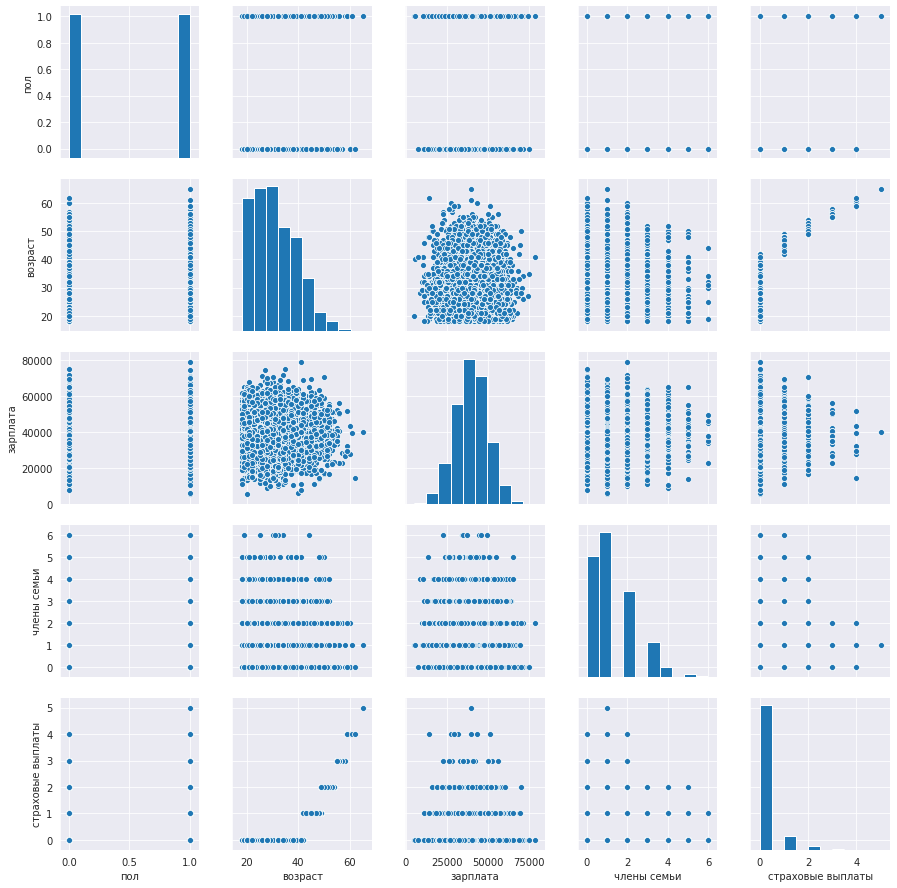

CPU times: user 16.9 s, sys: 509 ms, total: 17.5 s
Wall time: 1min 30s


In [2]:
%%time

#откроем датасет
data0 = pd.read_csv('/datasets/insurance.csv')
data0.name = 'data0'

#проанализируем данные
def data_exam(dat, number_column = None):
    #
    print('Таблица',dat.name)
    #столбцы к нижнему регистру
    dat.columns = dat.columns.str.lower()
    #
    display(dat.head(10))
    display(dat.shape)
    display(dat.dtypes)
    #посмотрим долю пустых значений в каждой колонке данных
    gaps_in_the_data = (pd
                    .DataFrame({'percent_of_nulls':dat.isna().sum()/len(dat)})
                    .sort_values(by='percent_of_nulls', ascending=False)
                   )
    gaps_in_the_data['percent_of_nulls'] = gaps_in_the_data['percent_of_nulls'].map(lambda x: '{:.2%}'.format(x))
    display(gaps_in_the_data)
    #посмотрим диапазоны значений
    display(dat.describe())
    #Посчитаем количество полных дубликатов
    print('Количество полных дубликатов:', dat.duplicated().sum())

    #посмотрим состав категоральных
    for feature in dat.select_dtypes('object'):
        print()
        print(feature)
        print(dat[feature].value_counts())
        
    #посмотрим распределение числовых данных
    if number_column == None:
        print('\nКоэффициенты корреляции для', dat.select_dtypes('number').columns)
        display(dat.select_dtypes('number').corr())
        sns.pairplot(dat.select_dtypes('number'))
    else:
        print('\nКоэффициенты корреляции для', dat.name, number_column)
        display(dat[number_column].corr())
        sns.pairplot(dat[number_column])
    plt.show()
        
#информация по таблице data_churn

data_exam(data0)
#проверим дубли по customerid - уникальному идентификатору клиента
#print('Уникальных строк по customerid:', data0['id'].value_counts().sum())

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
</font>
<font color='green'><br>
Данные на базе) ОК, хорошо, когда есть аналитическая культура - обязательно делать первичный анализ данных, не смотря на проект)

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

In [4]:
inv_mtrx = np.random.rand(4,4)

#найдем обратную
np.linalg.inv(inv_mtrx)

array([[ 3.19876533, -4.68026163,  1.90538557, -1.69938035],
       [-5.63780448,  3.51059054, -1.13117188,  5.39128361],
       [-1.33055764, -1.51667745,  1.93009137,  0.45831873],
       [ 1.22520121,  4.0400259 , -2.11362622, -1.43229704]])

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
</font>
<font color='green'><br>
хорошо, что проверяешь на обратимость

In [7]:
features = data0.drop('страховые выплаты', axis=1)
target = data0['страховые выплаты']

model = LinearRegression()
model.fit(features, target)
print('r2 score', model.score(features, target))
X_inv = features @ inv_mtrx
model.fit(X_inv, target)
print('r2 score после преобразования', model.score(X_inv, target))

r2 score 0.42494550286668
r2 score после преобразования 0.4249455028666679


**Ответ:** $ R^2 $ не поменяется

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
</font>
<font color='green'><br>
в общем-то всё уже доказано)

## Алгоритм преобразования

**Алгоритм**

1. Умножим на случайную матрицу INV   
2. Умножим на случайную матрицу INV2

**Обоснование:** $$
a = X_1 w
$$
$ a = X_1 (X^T X)^{-1} X^T y = X_1 X^{-1} (X^T)^{-1} X^T y = X_1 X^{-1} y $
$ a_1 = (X_1 A) ((X A)^T X A)^{-1} (X A)^T y =  (X_1 A) (X A)^{-1} ((X A)^T)^{-1}  (X A)^T y = X_1 A A^{-1} X^{-1} (X^T)^{-1} (A^T)^{-1} A^T X^T  y = X_1 E X^{-1} (X^T)^{-1} E X^T y  = X_1 X^{-1} (X^T)^{-1} X^T y = X_1 X^{-1}E y = X_1 X^{-1} y$

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
</font>
<font color='red'><br>
У матриц есть такие свойста<br>
- ($A(BC) = (AB)C$); это свойство ассоциативности (сочетательности) матриц<br>
- $(P^T)^{-1} = (P^{-1})^T$; то есть: транспортированная оратная матрица есть обратная матрица транспортированная <br>
- $(AB)^T = B^T A^T$; то есть: транспонированное произведение матриц равно произведению транспонированных матриц <br>
- $(AB)^{-1} = B^{-1} A^{-1}$,то есть: обратная матрица от произведения двух матриц равна обратной матрицы B(второй) к обратной матрице А(первой)<br>
- $P P^{-1} = E$ ; умножение матрицы на свою обратную - есть единичная матрица.<br>
    
Посмотри, пожалуйста, доказательство - мне кажется, что некоторые свойства не соблюдаются..

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА (03,05,2021) </u></b>
</font>
<font color='red'><br> Привет, Родион. Наверное, не сохранилось что-то в тератдке - не увидел твоих комментариев. НА всякий случай ещё раз напишу: У маткриц есть свойства. И не все свойства в доказательстве соблюдаются. В частности, посмотри вот эти: 
 $(AB)^T = B^T A^T$;  и $(AB)^{-1} = B^{-1} A^{-1}$ . Не то, чтобы было критично для проекта в целом. Но хотелось бы, чтобы всё в тетрадке осталось как надо) <br>
    
Буду ждать)

<div class="alert alert-info"> <b>Комментарий студента:</b> Однозначно не сохранились комментарии. Первый раз такое. Переделал. Все свойства соблюдаются, просто я вольно перегруппировывал множители. Сейчас я их справа налево беспорядочно не переносил. Вся последовательная логика должна соблюстись.</div>
<div class="alert alert-info"> Еще хотел задать вопрос. А как сохраняют перепеску ревьювер и студент на следующие работы, а тем более на стороннюю деятельность, если после сдачи работы никак с ревьювером не свяжешься. У меня пару раз вревью были комментарии желтые и при этом сразу работу принималась к зачету без возврата. Я всегда дорабатывал пожелания и при этом не мог даже связаться с ревьювером чтобы проверить правильно или нет. Суппорт слал к куратору - типа связь через него.</div>

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА 4</u></b>
</font>
<font color='green'><br>
Привет, Родион. И с линейной алгеброй ты справился)<br>
Всё, в общем-то, по делу, со смыслом. Доказательство в п.2 - теперь понятно)<br>
Да и весь проект - на уровне.<br>
Не забыл про проверку на обратимость! ОК<br>
    
Если рассматривать передачу данных третьим лицам, то к преимуществам данного подхода можно отнести, в первую очередь, ощутимую экономию ресурсов по сравнению с некоторыми известными алгоритмами шифрования, в особенности это касается ассиметричных алгоритмов с достаточно длинными ключами (AES, RSA), которые требуют много процессорного времени.<br><br>
    
К главному недостатку подхода можно отнести увеличение сложности проверки на вырожденность преобразования с ростом количества признаков в выборке. В рассмотренном случае необходимо подобрать подходящую матрицу размера  4×4 . Однако, если признаки будут исчисляться тысячами, что в теории всегда надо положить, то расчет соответствующих определителей может быть крайне ресурсозатратным. Но и эту проблему можно будет решить)<br><br>
    
По твоему вопросу постараюсь ответить (про жёлтые):<br>
Тут именно организация обучения-проверок. Ревьюеры стараются действовать, как заложено в дизайне взаимодействия. Есть два типа ошибок: критические - красный цвет , и жёлтые - комментарии на развитие. Руководители обучения ввели так: если жёлтый - то работу можно принимать. А ситуации дополнительных вопросов - действительно через кураторов. Может ещё вот так сделать: если ты хочешь, чтобы жёлтые тоже доделывать с проверкой, то написать об этом вначале проекта, чтобы ревьюер видел твою просьбу - отослать на доработку, даже если будут только жёлтые. По крайней мере, если мне попадётся - обязательно прислушаюсь)<br>
    
<br>Или ты спрашиваешь о том, что я написал выше в приветствии? СОхранять переписку - имел ввиду, что когда через полгода, например, открывается проект, то вот такая переписка помогает быстро сориентироаться.<br>

    
<font color='green'><font color='green'>
Спасибо) Успешного дальнейшего обучения

## Проверка алгоритма

In [11]:
inv_mtrx2 = np.random.rand(4,4)
#найдем обратную - проверим обратимость
display(np.linalg.inv(inv_mtrx2))
#
X_inv = features @ inv_mtrx @ inv_mtrx2
model.fit(X_inv, target)
print('r2 score после преобразования', model.score(X_inv, target))

array([[-0.48464388,  0.28349477, -0.07332783,  1.34046613],
       [-1.8906887 , -0.88333669,  1.54459932,  1.17715417],
       [-0.10602127,  1.39121217,  0.08984717, -1.82935153],
       [ 2.03867288, -0.63253547, -0.39463719,  0.17844015]])

r2 score после преобразования 0.4249455028667347


## Вывод:   

Качество прогноза линейной регрессии не меняется при умножении матрицы признаков на обратимую матрицу

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
</font>
<font color='green'><br>
Родион, сама практическая цель достигнута, ОК<br>
Тут всё верно. Есть всего момент для доплнений:<br>
    
В разделе "Умножение матриц" не все свойства соблюдаются(.<font color='red'><br>
Посометри, пожалуйста)<br><font color='green'><font color='green'>
Спасибо) Буду ждать.

## Чек-лист проверки

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные загружены
- [x]  Выполнен шаг 2: получен ответ на вопрос об умножении матриц
    - [x]  Указан правильный вариант ответа
    - [x]  Вариант обоснован
- [x]  Выполнен шаг 3: предложен алгоритм преобразования
    - [x]  Алгоритм описан
    - [x]  Алгоритм обоснован
- [x]  Выполнен шаг 4: алгоритм проверен
    - [x]  Алгоритм реализован
    - [x]  Проведено сравнение качества моделей до и после преобразования